<a href="https://colab.research.google.com/github/joseflix/DocenciaUAB/blob/master/MN1/2021_2022/Pr%C3%A0ctiques/Pr%C3%A0ctica5_Factor_de_Correlacio%CC%81n_Soluciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Práctica 5: Factor de correlación $\rho$**

<hr>

**Objectivo de la práctica** 

Vamos a ver cómo el factor de correlación entre dos muestras totalmente correlacionadas se puede llegar a perder por culpa de un ruido que añadiremos a las muestras.

<hr>

### <font color='orange'>**> Python #1**</font>

Vamos a comenzar generando $N=10000$ puntos equidistantes en las abscisas $(x,y) \in [-10,10]$  tales que $y_i = x_i$. 

Vamos a hacer una gráfica de los pares de puntos $(x,y)$ y calcularemos el factor de correlación a partir de

$$
\rho = \frac{Cov(x,y)}{\sigma_x \sigma_y} = \frac{E[(x−E[x])(y−E[y])]}{\sigma_x \sigma_y} = \frac{E[xy] - E[x]E[y]}{\sigma_x \sigma_y}
$$

Muestra el valor de $\rho$ en una leyenda o en el título de la gráfica.

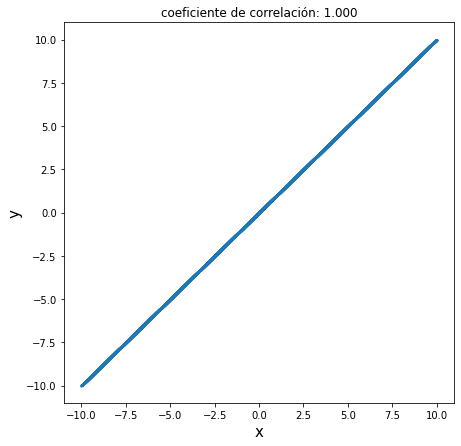

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N = 10000
x0 = np.linspace(-10,10,N) 
y0 = x0 

corr = np.mean((x0-np.mean(x0))*(y0-np.mean(y0)))/(np.std(x0)*np.std(y0))
#corr2 = (np.mean(x0*y0) - np.mean(x0)*np.mean(y0))/(np.std(x0)*np.std(y0))
#corr3 = np.cov(x0,y0,ddof=0)[0][1] / (np.std(x0)*np.std(y0)) # Alternativa usando la función cov de np # Las tres formas de calcularlo

plt.figure(figsize=(7, 7))
plt.scatter(x0, y0, s=2)
plt.xlabel("x", fontsize=15)
plt.ylabel("y", fontsize=15)
plt.title("coeficiente de correlación: %.3f" %corr)
plt.show()

### <font color='green'>**> Ejercicio #1**</font>

<hr>

<font color='green'>Esta práctica de 1h no tiene entrega, pero se tiene que realizar este ejercicio de programación durante la clase.</font>

<hr>

Ahora vamos a añadir un ruido Gaussiano sobre los puntos:

$$
x_i \to x_i + \epsilon_i \\
y_i \to y_i + \epsilon'_i
$$

tal que $\epsilon_i \sim G(0,\sigma)$ i $\epsilon'_i \sim G(0,\sigma)$ (Nota: Son dos distribuciones diferentes, centradas en 0 y que dependen de una misma $\sigma$, para simplificar...). 

Haz una gráfica similar a la del apartado anterior, pero ahora usando los puntos $(x,y)$ que tienen un ruido en (x,y) determinado por $\sigma = 100$. Incluye también el factor de correlación.

Veremos claramente que el ruido nos ha 'roto' la correlación entre las variables $x$ e $y$.

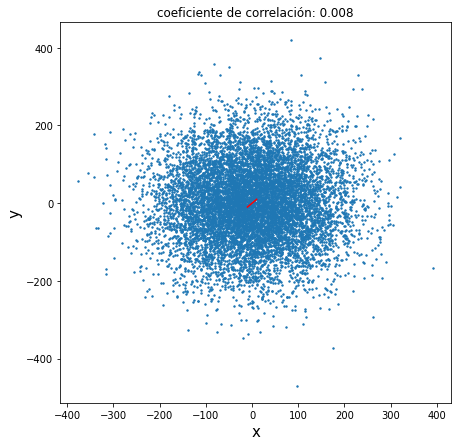

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N = 10000
x0 = np.linspace(-10,10,N) 
y0 = x0 

sigma = 100
x = x0 + np.random.normal(loc=0,scale=sigma,size=N) 
y = y0 + np.random.normal(loc=0,scale=sigma,size=N) 

#m = np.random.normal(loc=0,scale=sigma,size=N) 
#plt.hist(m,bins=60)
#plt.show()

corr = np.mean((x-np.mean(x))*(y-np.mean(y)))/(np.std(x)*np.std(y)) # 3 métodos

plt.figure(figsize=(7, 7))
plt.scatter(x, y, s=2)
plt.plot(x0,y0,'r-')
plt.xlabel("x", fontsize=15)
plt.ylabel("y", fontsize=15)
plt.title("coeficiente de correlación: %.3f" %corr)
plt.show()

### <font color='orange'>**> Python #2**</font>

Vamos a ver ahora cómo cambia $\rho$ en función de $\sigma$ del ruido que añadimos a la muestra. Para eso genera un array de 1000 sigmas equidistantes entre 0 (no ruido, $\rho$=1) y 100 (ruido anterior, $\rho$=0) y para cada una genera el ruido gaussiano para las Xs e Ys y aplícalo en los puntos para obtener una nueva $\rho$.  

Haz una gráfica de la evolución del factor de correlación en función de estas sigmas. 



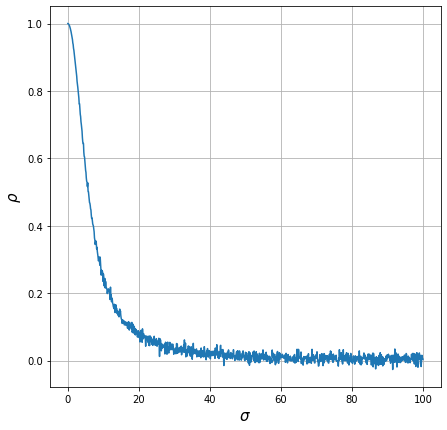

In [ ]:
N = 10000
x0 = np.linspace(-10,10,N) 
y0 = x0 

SigmaL=100 
SigmaN=1000 

sigmas = np.linspace(0.,SigmaL,SigmaN) 

SigmaL=100 
SigmaN=1000 

sigmas = np.linspace(0.,SigmaL,SigmaN) 

rhos = []

for sigma in sigmas:

  x = x0 + np.random.normal(0,sigma,N)
  y = y0 + np.random.normal(0,sigma,N)
  
  corr = np.mean((x-np.mean(x))*(y-np.mean(y)))/(np.std(x)*np.std(y))
  
  rhos.append(corr)
  
plt.figure(figsize=(7, 7))
plt.grid()
plt.plot(sigmas,rhos)
plt.ylabel(r"$\rho$", fontsize=15)
plt.xlabel(r"$\sigma$", fontsize=15)
#plt.yscale('log')
plt.show()

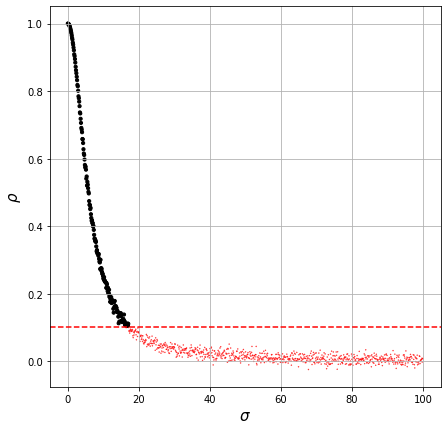

In [ ]:
# Ejemplo 2: podemos usar la función scatter para mostrar valores con diferentes colores y tamaños en función de rho
import numpy as np
import matplotlib.pyplot as plt

# 1) generar 𝑁=10000 puntos equidistantes en las abscisas (𝑥,𝑦)∈[−10,10] tales que 𝑦𝑖=𝑥𝑖

N=10000
xl = np.linspace(-10.,10.,N)
yl = xl

# 2) generar 10000 puntos equidistantes para las sigmas, entre 0 y 100

Ns = 1000
sLow = 0.
sHigh = 100.

sigmas = np.linspace(sLow, sHigh, Ns)

# 3) Hacer un bucle sobre las sigmas: 
#    - para cada una de las sigmas, generar 𝑁=10000 epsilons_i y epsilons'_i, que siguen una G(0,sigma), y añadirlo, punto a punto, a los xi y yi
#    - Calcular rho, y guardar en una lista

Acorr = []
tamanys = []
colors = []

for sigma in sigmas:
  xs = xl + np.random.normal(0., sigma, N)
  ys = yl + np.random.normal(0., sigma, N)
  Acorr.append((np.mean(xs*ys)-np.mean(xs)*np.mean(ys)) / (np.std(xs)*np.std(ys)))
  if (np.mean(xs*ys)-np.mean(xs)*np.mean(ys)) / (np.std(xs)*np.std(ys)) > .1: 
    tamanys.append(10)
    colors.append("k")
  else:
    tamanys.append(.15)
    colors.append("r")  

# 4) Mostrar los pares (Sigma,Rho) en una gràfica, para ver la evolución de Rho (romper la correlación)

plt.figure(figsize=(7, 7))
plt.scatter(sigmas, Acorr,s=tamanys, c=colors)
plt.plot()
plt.grid()
plt.ylabel(r"$\rho$", fontsize=15)
plt.xlabel(r"$\sigma$", fontsize=15)
plt.axhline(0.1,ls='--', c='r')
plt.show()